# Procesamiento de Lenguaje Natural (NLP): Análisis (clasificación) de sentimientos
Daniel Ernesto Zambrano 201914912

## Importacion de Librerias

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

## Leer los datos proporcionados

In [13]:
df = pd.read_csv('../Input_data/DatosSuicidio/SuicidiosProyecto.csv')
print(df.shape)
df_few = df.head(500)
print(df_few.shape)

(195700, 3)
(500, 3)


In [14]:
df_few.head()

,Unnamed: 0,text,class
0,173271,i want to destroy myselffor once everything wa...,suicide
1,336321,I kinda got behind schedule with learning for ...,non-suicide
2,256637,I'm just not sure anymoreFirst and foremost: I...,suicide
3,303772,please give me a reason to liveThats too much ...,suicide
4,293747,27f struggling to find meaning moving forwardI...,suicide


In [15]:
df = df.rename({'Unnamed: 0': 'id'},axis=1)
df_few = df_few.rename({'Unnamed: 0': 'id'},axis=1)

df_few.head()

,id,text,class
0,173271,i want to destroy myselffor once everything wa...,suicide
1,336321,I kinda got behind schedule with learning for ...,non-suicide
2,256637,I'm just not sure anymoreFirst and foremost: I...,suicide
3,303772,please give me a reason to liveThats too much ...,suicide
4,293747,27f struggling to find meaning moving forwardI...,suicide


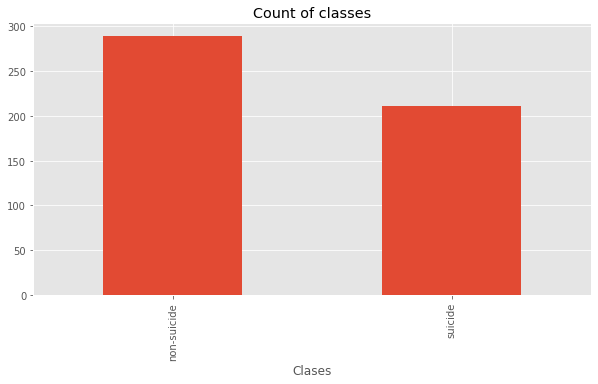

In [16]:
ax = df_few['class'].value_counts().plot(kind='bar',title='Count of classes', 
                                    figsize=(10,5))
ax.set_xlabel('Clases')
plt.show()

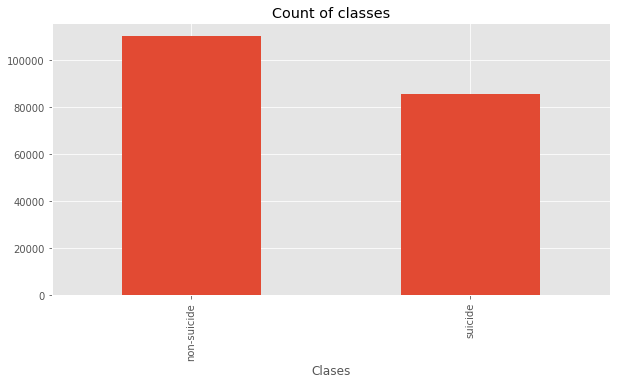

non-suicide    110165
suicide         85535
Name: class, dtype: int64

In [17]:
ax = df['class'].value_counts().plot(kind='bar',title='Count of classes', 
                                    figsize=(10,5))
ax.set_xlabel('Clases')
plt.show()

df['class'].value_counts()

Al hacer este analisis sobre el total de etiquetas para cada clase podemos ver que el problema tiene un conjunto de datos balanceado, en particular $\frac{||Suic||}{||NonSuic||} = 0.77 $,  indicativo de que entre tamaño de las clases **no** es considerablemente dispar en tamaño, luego no es necesario hacer un balanceo en etapas posteriores de procesamiento.

Con esto en consideracion, se procede a usar el archivo ya procesado por el flujo de limpieza de datos hecho en Tableu prep  

In [18]:
df_clean = pd.read_csv("../Input_data/DatosSuicidio/SuicidiosProyecto_clean.csv")
df_clean = df_clean.rename({'Unnamed: 0': 'id'},axis=1)
df_clean.shape

(195683, 3)

In [19]:
df_clean.head()

,id,text,class
0,250417,hi fello gamers my friend made a discord whos ...,non-suicide
1,317614,hi fello guys and guyettes sooo my friends hav...,non-suicide
2,200785,hi fello homo sapiens and hetero sapiens sooo ...,non-suicide
3,54971,hi fello peeps and peepettes discord server an...,non-suicide
4,139519,hi fello peeps and peepettes hi anyone wanna h...,non-suicide


### Procesamiento NTLK basico

In [20]:
eg = df['text'][167]
cl_eg = df['class'][167] 
print(eg)
print(cl_eg)

My mother found my vibe and is screaming at me for not talking about it I can't deal with this anymore. I bought an adult toy recently because my libido is quite high for a teenager and because I'm really stressed because of my mother. She gets angry at the stupidest things possible at me and dad. Today she was acting kinda mean and I didn't understand why. When I was at the mall, she changed my sheets even though she knows how much I hate when she enters my room without permission for anything  (I'm scared of her finding things that she wouldn't like and screaming at me), and found my vibrator. She called me and told me about it in a nit picking way, and kept asking me weird stuff about it. I told her that I'm super uncomfortable and stressed talking about this, and she said that we'll talk home. I told her I don't wanna talk at all about this with her, and she got super pissed, saying that "I'm your mother and I deserve to know because I do so many things for you ", and "you're oblig

En el ejemplo puede verse que el texto refiere a un sentimiento negativo y de fastidio pero dada la etiqueta, el texto es no suicida. 

In [21]:
tokens = nltk.word_tokenize(eg)
tokens[:10]

['My', 'mother', 'found', 'my', 'vibe', 'and', 'is', 'screaming', 'at', 'me']

In [22]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('My', 'PRP$'),
 ('mother', 'NN'),
 ('found', 'VBD'),
 ('my', 'PRP$'),
 ('vibe', 'NN'),
 ('and', 'CC'),
 ('is', 'VBZ'),
 ('screaming', 'VBG'),
 ('at', 'IN'),
 ('me', 'PRP')]

In [23]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  My/PRP$
  mother/NN
  found/VBD
  my/PRP$
  vibe/NN
  and/CC
  is/VBZ
  screaming/VBG
  at/IN
  me/PRP
  for/IN
  not/RB
  talking/VBG
  about/IN
  it/PRP
  I/PRP
  ca/MD
  n't/RB
  deal/VB
  with/IN
  this/DT
  anymore/NN
  ./.
  I/PRP
  bought/VBD
  an/DT
  adult/NN
  toy/NN
  recently/RB
  because/IN
  my/PRP$
  libido/NN
  is/VBZ
  quite/RB
  high/JJ
  for/IN
  a/DT
  teenager/NN
  and/CC
  because/IN
  I/PRP
  'm/VBP
  really/RB
  stressed/VBN
  because/IN
  of/IN
  my/PRP$
  mother/NN
  ./.
  She/PRP
  gets/VBZ
  angry/JJ
  at/IN
  the/DT
  stupidest/JJS
  things/NNS
  possible/JJ
  at/IN
  me/PRP
  and/CC
  dad/VB
  ./.
  Today/NN
  she/PRP
  was/VBD
  acting/VBG
  kinda/NN
  mean/NN
  and/CC
  I/PRP
  did/VBD
  n't/RB
  understand/VB
  why/WRB
  ./.
  When/WRB
  I/PRP
  was/VBD
  at/IN
  the/DT
  mall/NN
  ,/,
  she/PRP
  changed/VBD
  my/PRP$
  sheets/NNS
  even/RB
  though/IN
  she/PRP
  knows/VBZ
  how/WRB
  much/JJ
  I/PRP
  hate/VBP
  when/WRB
  she/PRP
  enters/VBZ
 

### Enfoque de Analisis

El enfoque que se usara para procesar el texto estructurado que ya tenemos, es el analisis de sentimientos en las palabras o estructuras identificadas en un texto pasado por parametro.

En primera instancia se hara un analisis en base a una herramienta basada en lexico que usa diccionarios para clasificar las estructuras del texto como positivas, negativas o neutrales. 

En nuestro caso, como entrada de prueba se usuara el ejemplo que ya se estructuro y se le aplicara **VADER** (Valence Aware Dictionary and sEntiment Reasoner) que es es la herramienta de análisis de sentimientos basada en reglas y léxico escogida, que está específicamente entrenada con los sentimientos expresados ​​en las redes sociales y funciona bien en textos de otros dominios. 

En segunda instancia se hara un analisis de sentimientos en base a un modelo ya entrenado usando una tarea de *masked language modeling* (MLM) que es simplemente predecir qué palabra debria llenar los espacios en blanco de una oración, recibe de entrada una mascara de texto como "la pelicula estuvo una \[MASCARA\]", y retorna las posibles palabras que podrian llenar tal mascara.

El modelo a usar se llama **RoBERTa** (Robustly Optimized BERT Pretraining Approach) y ees un modelo de transformadores preentrenado en un gran cuerpo de datos en inglés de manera autosupervisada. **RoBERTa** está destinado principalmente a ajustarse en una tarea especifica de modelado de lenguaje, que es nuestro caso es de sentimientos.

Haremos que tambien clasifique estructuras del texto en positivas, negativas o neutras pero, en este modelo ya se consideran las relaciones entre palabras y frases, asi como tambien el sarcasmo y mas comportamientos exhibidos por las personas cuando escriben algun texto.

## Paso 1: Analisis con **VADER**
- El resultado de analisis de VADER es una 4-tupla, que contiene 3 puntajes general para todo el texto y un puntaje compuesto que toma en cuenta los otros 3.
    * $<PostiveScore, NeutralScore, NegativeScore, CompoundScore>$.
    * El rango de los primeros 3 puntajes es $[0,1]$ siendo 0 el valor que tomaria un puntaje si el texto no denota tal sentimiento y 1 siendo el mayor valor sentimental que podria tomar el texto en un puntaje concreto.
    * El rango del puntaje compuesto es $[-1,1]$, siendo -1 un sentimiento altamente negativo, 0 un sentimiento altamente neutral y 1 un sentimiento altamente positivo.

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [25]:
sia.polarity_scores("i am a miserable, pathethic piece of crap")

{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.7003}

In [26]:
sia.polarity_scores("Dude, this is so awesome")

{'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.7384}

In [27]:
sia.polarity_scores(eg)

{'neg': 0.118, 'neu': 0.863, 'pos': 0.019, 'compound': -0.9932}

In [74]:
res = {}
puteao = []
for i, row in tqdm(df_clean.iterrows(), total=len(df_clean)):
    try:
        text = row['text']
        df_id = row['id']
        res[df_id] = sia.polarity_scores(text)
    except AttributeError:
        puteao.append(df_id)
        print(len(puteao))


  0%|          | 0/195683 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [39]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df_clean, how='left')

In [30]:
vaders.head()

,id,neg,neu,pos,compound,text,class
0,250417,0.045,0.754,0.201,0.8074,hi fello gamers my friend made a discord whos ...,non-suicide
1,317614,0.056,0.817,0.127,0.7283,hi fello guys and guyettes sooo my friends hav...,non-suicide
2,200785,0.055,0.821,0.124,0.7283,hi fello homo sapiens and hetero sapiens sooo ...,non-suicide
3,54971,0.092,0.700,0.208,0.7283,hi fello peeps and peepettes discord server an...,non-suicide
4,139519,0.070,0.692,0.238,0.8914,hi fello peeps and peepettes hi anyone wanna h...,non-suicide


## Supuestos

* Tomaremos de supuestos:
    - $h_1$: Los textos con un score compuesto negativo son textos con la etiqueta "suicide"
    - $h_1^c$: Los textos con un score compuesto positivo son textos con la etiqueta "non-suicide"
    - $h_2$: Los textos con un score negativo alto son textos con la etiqueta "suicide"
    - $h_2^c$: Los textos con un score positivo alto son textos con la etiqueta "non-suicide"

Para su comprobacion se hara uso de los resultados del procesamiento hecho sobre VADER, en los datos de suicidio.

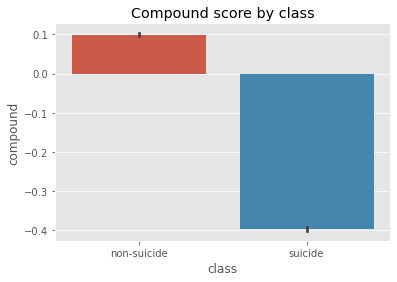

In [31]:
ax = sns.barplot(data=vaders, x='class', y='compound')
ax.set_title('Compound score by class')
plt.show()

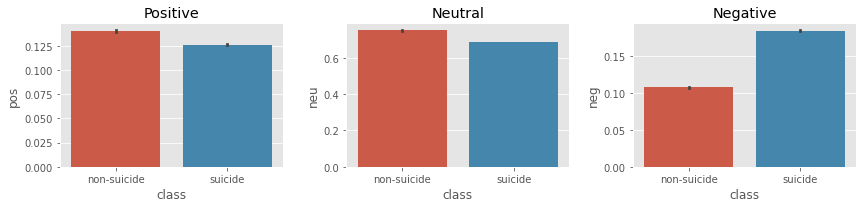

In [32]:
fig, axs = plt.subplots(1, 3,figsize=(12,3))
sns.barplot(data=vaders, x='class', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='class', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='class', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Analisis con el modelo pre-entrenado RoBERTa

In [33]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [34]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [35]:
print(eg)
sia.polarity_scores(eg)

My mother found my vibe and is screaming at me for not talking about it I can't deal with this anymore. I bought an adult toy recently because my libido is quite high for a teenager and because I'm really stressed because of my mother. She gets angry at the stupidest things possible at me and dad. Today she was acting kinda mean and I didn't understand why. When I was at the mall, she changed my sheets even though she knows how much I hate when she enters my room without permission for anything  (I'm scared of her finding things that she wouldn't like and screaming at me), and found my vibrator. She called me and told me about it in a nit picking way, and kept asking me weird stuff about it. I told her that I'm super uncomfortable and stressed talking about this, and she said that we'll talk home. I told her I don't wanna talk at all about this with her, and she got super pissed, saying that "I'm your mother and I deserve to know because I do so many things for you ", and "you're oblig

{'neg': 0.118, 'neu': 0.863, 'pos': 0.019, 'compound': -0.9932}

In [36]:
tokenizer.model_max_length=100000000000000

In [37]:
tokenizer.model_max_length

100000000000000

In [38]:
encoded_text = tokenizer(eg, return_tensors='pt')
output = model(encoded_text['input_ids'],encoded_text['attention_mask'])

scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    
    'roberta_neu': scores[1],
    
    'roberta_pos': scores[2],
}

print(scores_dict)


RuntimeError: The expanded size of the tensor (671) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 671].  Tensor sizes: [1, 514]

In [40]:
test= tokenizer("Great stuff my dude :)", return_tensors='pt')
output = model(test['input_ids'],test['attention_mask'])
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    
    'roberta_neu': scores[1],
    
    'roberta_pos': scores[2],
}

print(scores_dict)

{'roberta_neg': 0.001641685, 'roberta_neu': 0.015003683, 'roberta_pos': 0.9833547}


In [41]:
print(len(encoded_text['input_ids'][0]))
print(len(encoded_text['attention_mask'][0]))

671
671


In [42]:
len(test['input_ids'][0])

7

In [43]:
test

{'input_ids': tensor([[    0, 19065,  2682,   127, 22633, 44660,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

# Limitaciones de **RoBERTa**
    (o cualquier modelo de transformadores en general)

Como podemos apreciar en el error de arriba, el modelo RoBERTa y en general los modelos basados en transformadores solo pueden procesar *textos cortos* (como los tweets), en especifico, textos que no generen mas de 512 tokens al realizar el preprocesamiento para estructurar el texto, y mas tecnicamente, textos que junto con los *tags* puestos por el tokenizer, \[CLS\] y \[SEP\], no generen mas de 514 tokens.

Luego es necesario considerar una manera de procesar nuestro ejemplo, y en particular, los textos a procesar dentro de los datos que sean medianamente largos o realmente largos. 

Nuestra propuesta es:

1. **dividir** toda la tokenizacion en segmentos de 512 tokens, esto es $\frac{||text||}{512}$.
2. Modificar los tokens para que sean validos , es decir, añadir *tags* manualmente al tensor que retorna la tokenizacion 
3. Procesar los tensores en RoBERTa.
4. Realizar un promedio podenrado de los puntajes de cada uno de los tensores. 
5. Se retorna ese promedio y se almacena. 


### ¿Por qué no en pedazos de 514? 
Porque habra que añadir manualmente los tags del modelo despues de dividir la tokenizacion en segmentos de 512 tokens.


In [59]:
def sentiment_roberta(tokens):
    # get output logits from the model
    output = model(**tokens)
    # convert to probabilities
    probs = torch.nn.functional.softmax(output[0], dim=-1)
    probs = probs.detach().numpy()
    N =len(probs)

    neg,neu,pos=0,0,0

    for tensor in probs:
        neg +=tensor[0]
        neu +=tensor[1]
        pos +=tensor[2]

    probs_dict = {
            'roberta_neg': neg/N,
            'roberta_neu': neu/N,
            'roberta_pos': pos/N,
        }    
    return probs_dict

In [45]:

chunksize = 512

input_id_chunks = list(encoded_text['input_ids'][0].split(int(chunksize - 2)))
mask_chunks = list(encoded_text['attention_mask'][0].split(int(chunksize - 2)))

for i in range(len(input_id_chunks)):
    # añadir CLS y SEP a cada chunck de tokens
    input_id_chunks[i] = torch.cat([
        torch.tensor([101]), input_id_chunks[i], torch.tensor([102])
    ])
    # añádir los attention tokens el padding de los tags
    mask_chunks[i] = torch.cat([
        torch.tensor([1]), mask_chunks[i], torch.tensor([1])
    ])
    #calcular el tamaño del padding 
    pad_len = chunksize - input_id_chunks[i].shape[0]
    # revisar si la longitud del padding en el tensor es la requerida
    if pad_len > 0:
        # en caso de que no, se añade el padding necesario
        input_id_chunks[i] = torch.cat([
            input_id_chunks[i], torch.Tensor([0] * pad_len)
        ])
        mask_chunks[i] = torch.cat([
            mask_chunks[i], torch.Tensor([0] * pad_len)
        ])

for chunk in input_id_chunks:
    print(len(chunk))
# imprimir el chunk final para ver si quedo bien configurado
chunk

512
512


tensor([1.0100e+02, 6.6000e+01, 9.0000e+00, 1.2700e+02, 9.2900e+02, 4.0000e+00,
        2.5200e+02, 1.7470e+03, 3.1400e+02, 7.1000e+01, 3.8000e+01, 5.5400e+02,
        9.7010e+03, 6.0000e+00, 1.9000e+01, 3.7950e+03, 6.3460e+03, 6.9000e+01,
        2.4730e+03, 6.0000e+00, 8.0000e+00, 3.8000e+01, 1.7400e+02, 1.0600e+02,
        1.4000e+01, 3.8000e+01, 3.9900e+02, 7.5000e+01, 2.3126e+04, 1.9200e+02,
        1.4300e+02, 9.0000e+00, 1.0600e+02, 4.5200e+02, 6.0000e+00, 5.3000e+01,
        1.2700e+02, 9.8500e+02, 1.6820e+03, 6.6700e+02, 7.0000e+00, 4.6500e+02,
        1.0000e+01, 1.2190e+03, 7.0000e+00, 1.0670e+03, 7.0000e+00, 1.6200e+02,
        4.0000e+00, 5.0118e+04, 5.0118e+04, 7.6080e+03, 5.2400e+02, 3.8000e+01,
        2.9301e+04, 1.4370e+03, 7.0000e+00, 1.0900e+02, 4.2000e+01, 1.1600e+02,
        1.5340e+03, 4.2000e+01, 2.3400e+03, 1.1600e+02, 3.8000e+01, 2.1800e+02,
        7.5000e+01, 2.3126e+04, 1.0670e+03, 2.3000e+01, 7.0000e+01, 5.9000e+01,
        4.2000e+01, 3.2800e+02, 3.8000e+

In [46]:
input_ids = torch.stack(input_id_chunks)
attention_mask = torch.stack(mask_chunks)

input_dict = {
    'input_ids': input_ids.long(),
    'attention_mask': attention_mask.int()
}
input_dict

{'input_ids': tensor([[ 101,    0, 2387,  ...,  236,  106,  102],
         [ 101,   66,    9,  ...,    0,    0,    0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32)}

In [48]:
sentiment_roberta(input_dict)

[[0.84268534 0.1395222  0.01779247]
 [0.97722363 0.02047614 0.00230022]]


{'roberta_neg': 0.9099544882774353,
 'roberta_neu': 0.07999916840344667,
 'roberta_pos': 0.010046346462331712}

In [50]:
def chunkify_tokens(ptokens):  
    
    chunksize = 512

    input_id_chunks = list(ptokens['input_ids'][0].split(int(chunksize - 2)))
    mask_chunks = list(ptokens['attention_mask'][0].split(int(chunksize - 2)))

    for i in range(len(input_id_chunks)):
        # añadir CLS y SEP a cada chunck de tokens
        input_id_chunks[i] = torch.cat([
            torch.tensor([101]), input_id_chunks[i], torch.tensor([102])
        ])
        # añádir los attention tokens el padding de los tags
        mask_chunks[i] = torch.cat([
            torch.tensor([1]), mask_chunks[i], torch.tensor([1])
        ])
        #calcular el tamaño del padding 
        pad_len = chunksize - input_id_chunks[i].shape[0]
        # revisar si la longitud del padding en el tensor es la requerida
        if pad_len > 0:
            # en caso de que no, se añade el padding necesario
            input_id_chunks[i] = torch.cat([
                input_id_chunks[i], torch.Tensor([0] * pad_len)
            ])
            mask_chunks[i] = torch.cat([
                mask_chunks[i], torch.Tensor([0] * pad_len)
            ])
        input_ids = torch.stack(input_id_chunks)
        attention_mask = torch.stack(mask_chunks)

        input_dict = {
            'input_ids': input_ids.long(),
            'attention_mask': attention_mask.int()
            }
        return input_dict  


In [69]:
def polarity_scores_roberta(text):
    tokens = tokenizer(text, return_tensors='pt')
    if len(tokens[0]) > 512:
        input_dict = chunkify_tokens(tokens)
        r_dict = sentiment_roberta(input_dict)
    else:
        r_dict = sentiment_roberta(tokens)
    return r_dict

In [79]:
res = {}
puteaoRuntime = []
for i, row in tqdm(df_clean.iterrows(), total=len(df_clean)):
    try:
        text = row['text']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        puteaoRuntime.append(myid)
        print(f'puteao en Runtime {len(puteaoRuntime)}')
    except AttributeError:
        puteao.append(myid)
        print(f'puteao {len(puteao)}')



  0%|          | 0/195683 [00:00<?, ?it/s]

puteao en Runtime 1
puteao en Runtime 2
puteao en Runtime 3
puteao en Runtime 4
puteao en Runtime 5
puteao en Runtime 6
puteao en Runtime 7
puteao en Runtime 8
puteao en Runtime 9
puteao en Runtime 10
puteao en Runtime 11
puteao en Runtime 12
puteao en Runtime 13
puteao en Runtime 14
puteao en Runtime 15
puteao en Runtime 16
puteao en Runtime 17
puteao en Runtime 18
puteao en Runtime 19
puteao en Runtime 20
puteao en Runtime 21
puteao en Runtime 22
puteao en Runtime 23
puteao en Runtime 24
puteao en Runtime 25
puteao en Runtime 26
puteao en Runtime 27
puteao en Runtime 28
puteao en Runtime 29
puteao en Runtime 30
puteao en Runtime 31
puteao en Runtime 32
puteao en Runtime 33
puteao en Runtime 34
puteao en Runtime 35
puteao en Runtime 36
puteao en Runtime 37
puteao en Runtime 38
puteao en Runtime 39
puteao en Runtime 40
puteao en Runtime 41
puteao en Runtime 42
puteao en Runtime 43
puteao en Runtime 44
puteao en Runtime 45
puteao en Runtime 46
puteao en Runtime 47
puteao en Runtime 48
p

In [65]:
err = df_clean['text'][122]

In [68]:
tokens = tokenizer(err, return_tensors='pt')
print(len(tokens[0]))
print(tokens)

514
{'input_ids': tensor([[    0,   506,  3306,     7,   465,  3099,  1375,   556,   118,  8109,
            42,    16,    10,   828,     9,    10,   251, 25693,    98,  3392,
            47,  1268,    54, 10200,     7,  1166,   149,    24,   939,   269,
          5478,    24,  6992,   939,    33,  1341,    10,   367,   205,   383,
            11,   127,   301,   217,   205,   964,     8,    10,  8520,   284,
            53,   114,    47,  1394,   162,    99,  7416,  3127,   120,   162,
            62,    11,     5,   662,    19,     5,    40,     7,   697,    89,
            32,    80, 13176,  9240,  2855,  5274,  8592,    10,   756,    11,
          2410,     8,     5,  1114,     9,  3064,    11,   657,    19,     5,
          1816,     9,   127,  7416,    11,   239,   334,   939,  1276,   939,
            21,   164,     7,   146,    23,   513,    65,     9,   167,    80,
          7416,   283,  1528,    98,   939,  2208,    10,  2410,  3093,     8,
           554,  6016,   127,   17

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [ ]:
df_clean.head()

,id,text,class
0,250417,hi fello gamers my friend made a discord whos ...,non-suicide
1,317614,hi fello guys and guyettes sooo my friends hav...,non-suicide
2,200785,hi fello homo sapiens and hetero sapiens sooo ...,non-suicide
3,54971,hi fello peeps and peepettes discord server an...,non-suicide
4,139519,hi fello peeps and peepettes hi anyone wanna h...,non-suicide


In [ ]:
results_df.columns

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='class',
            palette='tab10')
plt.show()